<a href="https://colab.research.google.com/github/HamidM9/Deep_Learning/blob/main/Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the CIFAR-10 dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: CIFAR-10 dataset


We will use the CIFAR-10 dataset.The dataset consists of 60000 images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Each sample is a 32x32 pixels color image, associated with a label from 10 classes:

```
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
```

Each pixel intensity is represented by a `uint8` (byte) from 0 to 255.
We will divide the dataset in training, testing and validation set. As we know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one and in color images is 3). Therefore, if you are using grayscale images use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims#:~:text=Used%20in%20the%20notebooks,-Used%20in%20the&text=This%20operation%20is%20useful%20to,to%20a%20tensor%20of%20scalars) to transform each image from a matrix to a 3-dimensional tensor. Finally, we have to normalize the input data.

In [ ]:
cifar_10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = (
    cifar_10.load_data()) # The dataset is already divede in test and training

# We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]


170508288/170498071 [==============================] - 3s 0us/step


Let's take a look at a sample of the images in the dataset:

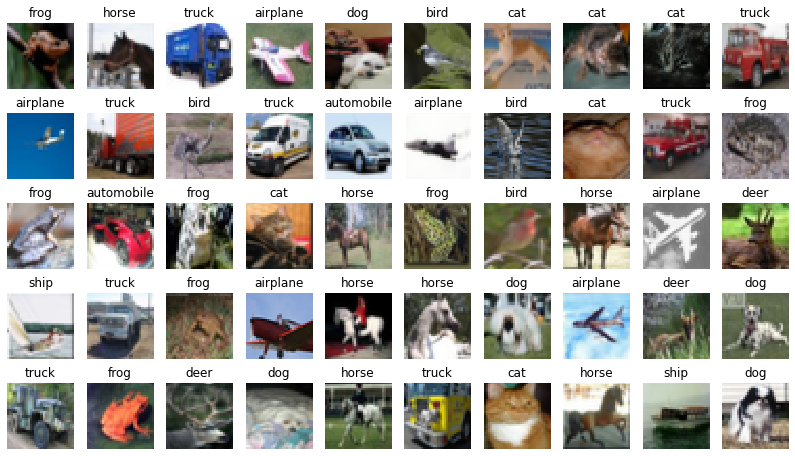

In [ ]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]])
plt.show()

Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale.

In [ ]:
#define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#For each feature (pixel intensity), we must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)

X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)

X_train = (X_train-X_train_mean)/X_train_std 
X_valid = (X_valid-X_train_mean)/X_train_std 
X_test = (X_test-X_train_mean)/X_train_std 


#Add one dimension to manage the channel if you are using grayscale images.
#X_train=tf.expand_dims(X_train, 3) 
#X_valid=tf.expand_dims(X_valid, 3) 
#X_test=tf.expand_dims(X_test,3)

#ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(None, 32, 32, 1, 3)
#resolving above Error requires changes in input shape of Conv2D that makes changes in the whole code. so for this file I decided not to use this part.
#Make sure to compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[32, 32, 3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])


Print the model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
352/352 [==============================] - 32s 89ms/step - loss: 1.4584 - accuracy: 0.4908 - val_loss: 1.2989 - val_accuracy: 0.5460
Epoch 2/10
352/352 [==============================] - 30s 84ms/step - loss: 1.1522 - accuracy: 0.6007 - val_loss: 1.1107 - val_accuracy: 0.6118
Epoch 3/10
352/352 [==============================] - 28s 80ms/step - loss: 1.0335 - accuracy: 0.6444 - val_loss: 1.1047 - val_accuracy: 0.6188
Epoch 4/10
352/352 [==============================] - 29s 83ms/step - loss: 0.9584 - accuracy: 0.6702 - val_loss: 1.0437 - val_accuracy: 0.6420
Epoch 5/10
352/352 [==============================] - 32s 91ms/step - loss: 0.9046 - accuracy: 0.6911 - val_loss: 1.0625 - val_accuracy: 0.6380
Epoch 6/10
352/352 [==============================] - 30s 85ms/step - loss: 0.8696 - accuracy: 0.7009 - val_loss: 1.0347 - val_accuracy: 0.6452
Epoch 7/10
352/352 [==============================] - 29s 83ms/step - loss: 0.8284 - accuracy: 0.7167 - val_loss: 1.0023 - val_accuracy:

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 2s - loss: 1.0135 - accuracy: 0.6586 - 2s/epoch - 7ms/step
accuracy: 65.86%


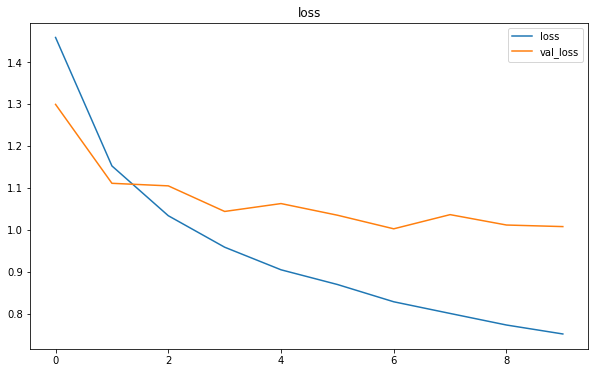

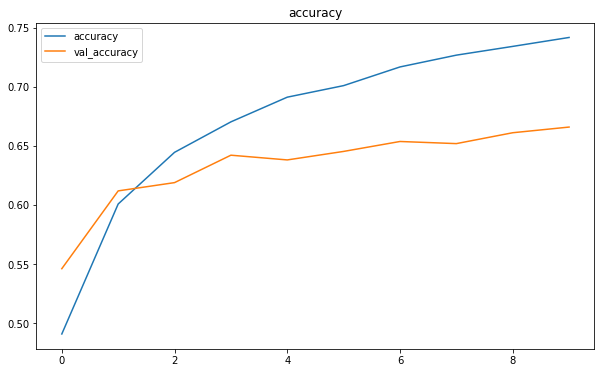

In [ ]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'], label='loss')
  plt.plot(history.epoch,history.history['val_loss'],label='val_loss')
  plt.title('loss')
  plt.legend()
  
def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'],label='accuracy')
  plt.plot(history.epoch,history.history['val_accuracy'],label='val_accuracy')
  plt.title('accuracy')
  plt.legend()
  
plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

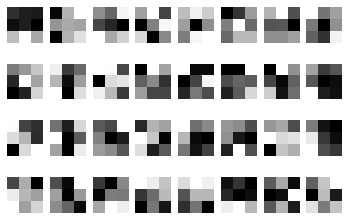

In [ ]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

# Considerations

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.


 The formula:
param_number = output_channel_number * (input_channel_number * kernel_height * kernel_width + 1)

output shape is: (None, 30, 30, 32) so our output chanel number is 32.
input_shape is: [32, 32,3] so our input channel number is 3.
Kernel Size is 3*3 so the kernel height and weight both are 3.
32 * (3*3*3+1) = 896

with the similar calculation, the second Conv2D is:
16 * ( 32 * 2*2+1) = 2064

number is 32 from the previous MaxPooling2D layer. because the output of previous layer is the input of current layer.

****
refrences:

1- Understanding and Calculating the number of Parameters in Convolution Neural Networks (CNNs).

2- How to Calculate the Number of Parameters in Keras Models.

https://towardsdatascience.com/ 

****


Two reasons:

1- According to above explaination, in the first Conv2d, we dont have any Maxpooling2D as an Input.

2- The kernel size defined for the first one is 3 * 3 and for the second one is 2 * 2.

Let's now train our deep CNN.

Epoch 1/10
352/352 [==============================] - 30s 85ms/step - loss: 1.6257 - accuracy: 0.4156 - val_loss: 1.3618 - val_accuracy: 0.5224
Epoch 2/10
352/352 [==============================] - 30s 85ms/step - loss: 1.2954 - accuracy: 0.5430 - val_loss: 1.2212 - val_accuracy: 0.5782
Epoch 3/10
352/352 [==============================] - 30s 85ms/step - loss: 1.1798 - accuracy: 0.5895 - val_loss: 1.1364 - val_accuracy: 0.6020
Epoch 4/10
352/352 [==============================] - 30s 85ms/step - loss: 1.1054 - accuracy: 0.6162 - val_loss: 1.0795 - val_accuracy: 0.6284
Epoch 5/10
352/352 [==============================] - 30s 85ms/step - loss: 1.0505 - accuracy: 0.6371 - val_loss: 1.0776 - val_accuracy: 0.6248
Epoch 6/10
352/352 [==============================] - 30s 85ms/step - loss: 1.0146 - accuracy: 0.6500 - val_loss: 1.0218 - val_accuracy: 0.6424
Epoch 7/10
352/352 [==============================] - 30s 84ms/step - loss: 0.9823 - accuracy: 0.6624 - val_loss: 1.0136 - val_accuracy:

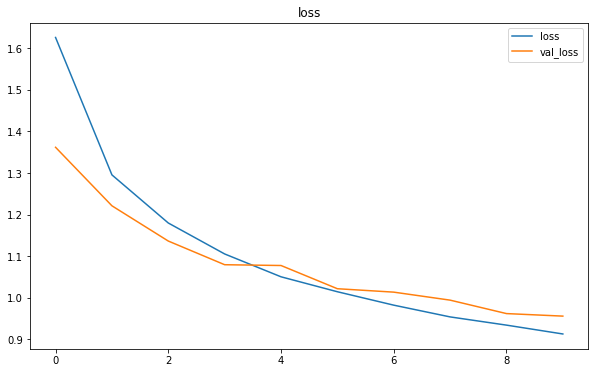

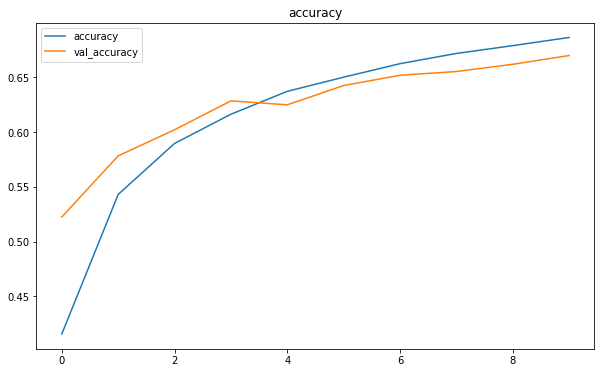

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

##  Develop a better CNN
Let's develop a network that performs better than the very simple one above. This part aims to explore how much the various hyper-parameters influence the classification capability of the model. 

** The task is to modify some of the hyper-parameters of the previous task's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous part.
The cell below reports only the code of the one of the  **best models** that we can find. In addtion, we print out its result on the test set, and plot the accuracy and the loss trends in the notebook.

Cution: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*   number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration.

### Example of tests discussion
The best model that we have found has two layers of Conv2D (filters: 64 & 32) with Relu activation plus both max-pooling, batch-size of 256 and 15 epochs and Adam optimizer.

The achieved accuracy in the test set is 68.15

Discussion:
The problem is that I can achieve better accuracy on test data but with poor generalization. Thats why I chose this model as the best model.

Epoch 1/10
176/176 [==============================] - 51s 288ms/step - loss: 1.6037 - accuracy: 0.4310 - val_loss: 1.3228 - val_accuracy: 0.5412
Epoch 2/10
176/176 [==============================] - 51s 289ms/step - loss: 1.2603 - accuracy: 0.5570 - val_loss: 1.2023 - val_accuracy: 0.5832
Epoch 3/10
176/176 [==============================] - 51s 289ms/step - loss: 1.1402 - accuracy: 0.6050 - val_loss: 1.1086 - val_accuracy: 0.6150
Epoch 4/10
176/176 [==============================] - 51s 289ms/step - loss: 1.0602 - accuracy: 0.6322 - val_loss: 1.0558 - val_accuracy: 0.6342
Epoch 5/10
176/176 [==============================] - 51s 289ms/step - loss: 1.0057 - accuracy: 0.6514 - val_loss: 1.0297 - val_accuracy: 0.6394
Epoch 6/10
176/176 [==============================] - 51s 289ms/step - loss: 0.9536 - accuracy: 0.6697 - val_loss: 0.9928 - val_accuracy: 0.6590
Epoch 7/10
176/176 [==============================] - 51s 289ms/step - loss: 0.9220 - accuracy: 0.6830 - val_loss: 0.9821 - val_ac

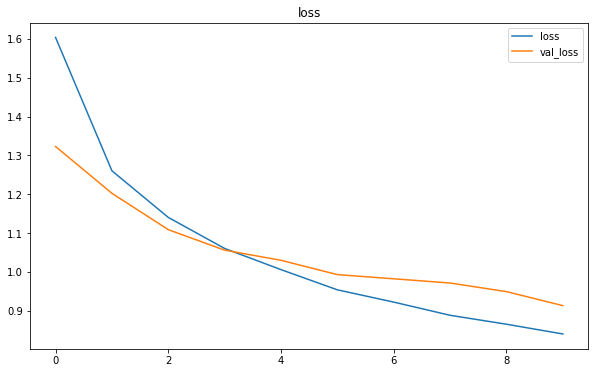

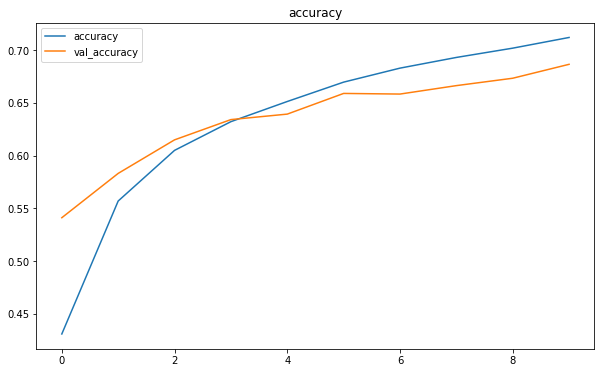

In [ ]:
# THE BEST MODEL 1:

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=32, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, batch_size=256,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

Brief steps to achieve this model: 

Previous task accuracy was: 65.60%

1- For the first attempt: I added one Conv2d(8) + Maxpool2d ==> Accuracy: 57.74%

2- only one layer od Conv2d(8) ==> Accuracy: 61.37%
So I decided to have 2 layers.

3- increasing filters for Conv2d layers (128 & 64) ==> Accuracy: 70.76 (overfitting)

4- Changing the activation function to Leaky Relu ==> Acccuracy:  66.26 (Small Improvement)

5- Increasing epochs from 10 to 15 ==> Accuracy: 66.19 (small improvement)

6- Decreasing the Batch size from 128 to 64 ==> Accuracy: 66.59%

7- Decreasing the Batch size from 128 to 32 ==> Accuracy: 67.24 (It is not possible to have a very small Batch size because of overfitting)

8- Optimizer: sgd , I think adam is a good optimizer for this problem. so I will keep it. 55.78

9- I turned off the second max pooling ==> Accuracy: 66.07

at the end I played with the parameters hundred times but I didnt write all of them here because I was not satisfied with the result. 


Discussion:
The model becomes overfitted easily so it is very important to choose the parameters carefully.

In [ ]:
# 1) number of layers or neurons

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=8, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")



Epoch 1/10
352/352 [==============================] - 32s 91ms/step - loss: 1.9106 - accuracy: 0.3004 - val_loss: 1.6435 - val_accuracy: 0.4034
Epoch 2/10
352/352 [==============================] - 32s 92ms/step - loss: 1.5618 - accuracy: 0.4313 - val_loss: 1.4881 - val_accuracy: 0.4556
Epoch 3/10
352/352 [==============================] - 37s 104ms/step - loss: 1.4569 - accuracy: 0.4713 - val_loss: 1.3963 - val_accuracy: 0.4998
Epoch 4/10
352/352 [==============================] - 32s 92ms/step - loss: 1.3932 - accuracy: 0.5001 - val_loss: 1.3413 - val_accuracy: 0.5214
Epoch 5/10
352/352 [==============================] - 32s 92ms/step - loss: 1.3375 - accuracy: 0.5254 - val_loss: 1.3066 - val_accuracy: 0.5380
Epoch 6/10
352/352 [==============================] - 33s 94ms/step - loss: 1.2887 - accuracy: 0.5451 - val_loss: 1.2459 - val_accuracy: 0.5508
Epoch 7/10
352/352 [==============================] - 32s 91ms/step - loss: 1.2496 - accuracy: 0.5592 - val_loss: 1.2281 - val_accuracy

In [ ]:
# 2) number of layers or neurons

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=8, kernel_size=[2,2], activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

Epoch 1/10
352/352 [==============================] - 37s 102ms/step - loss: 1.7436 - accuracy: 0.3694 - val_loss: 1.4527 - val_accuracy: 0.4852
Epoch 2/10
352/352 [==============================] - 38s 109ms/step - loss: 1.3977 - accuracy: 0.4976 - val_loss: 1.3366 - val_accuracy: 0.5278
Epoch 3/10
352/352 [==============================] - 40s 114ms/step - loss: 1.2901 - accuracy: 0.5416 - val_loss: 1.2601 - val_accuracy: 0.5580
Epoch 4/10
352/352 [==============================] - 38s 109ms/step - loss: 1.2265 - accuracy: 0.5661 - val_loss: 1.2156 - val_accuracy: 0.5626
Epoch 5/10
352/352 [==============================] - 46s 131ms/step - loss: 1.1809 - accuracy: 0.5812 - val_loss: 1.1625 - val_accuracy: 0.5896
Epoch 6/10
352/352 [==============================] - 38s 108ms/step - loss: 1.1453 - accuracy: 0.5982 - val_loss: 1.1255 - val_accuracy: 0.6046
Epoch 7/10
352/352 [==============================] - 38s 108ms/step - loss: 1.1125 - accuracy: 0.6109 - val_loss: 1.1079 - val_ac

In [ ]:
# 3) number of filters dimension

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=64, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

Epoch 1/10
352/352 [==============================] - 131s 370ms/step - loss: 1.4173 - accuracy: 0.4999 - val_loss: 1.1519 - val_accuracy: 0.6024
Epoch 2/10
352/352 [==============================] - 127s 361ms/step - loss: 1.0684 - accuracy: 0.6282 - val_loss: 1.0311 - val_accuracy: 0.6514
Epoch 3/10
352/352 [==============================] - 126s 358ms/step - loss: 0.9412 - accuracy: 0.6745 - val_loss: 0.9354 - val_accuracy: 0.6764
Epoch 4/10
352/352 [==============================] - 126s 358ms/step - loss: 0.8638 - accuracy: 0.7038 - val_loss: 0.9145 - val_accuracy: 0.6828
Epoch 5/10
352/352 [==============================] - 140s 396ms/step - loss: 0.8000 - accuracy: 0.7241 - val_loss: 0.8803 - val_accuracy: 0.6942
Epoch 6/10
352/352 [==============================] - 128s 363ms/step - loss: 0.7464 - accuracy: 0.7424 - val_loss: 0.8757 - val_accuracy: 0.7020
Epoch 7/10
352/352 [==============================] - 125s 355ms/step - loss: 0.7040 - accuracy: 0.7585 - val_loss: 0.8288 -

In [ ]:
# 4) activation functions

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='leaky_relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16
                        , kernel_size=[2,2], activation='leaky_relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

Epoch 1/10
352/352 [==============================] - 37s 105ms/step - loss: 1.6219 - accuracy: 0.4228 - val_loss: 1.3540 - val_accuracy: 0.5276
Epoch 2/10
352/352 [==============================] - 38s 108ms/step - loss: 1.2920 - accuracy: 0.5465 - val_loss: 1.2269 - val_accuracy: 0.5714
Epoch 3/10
352/352 [==============================] - 37s 105ms/step - loss: 1.1708 - accuracy: 0.5932 - val_loss: 1.1401 - val_accuracy: 0.5956
Epoch 4/10
352/352 [==============================] - 37s 105ms/step - loss: 1.0913 - accuracy: 0.6212 - val_loss: 1.0943 - val_accuracy: 0.6208
Epoch 5/10
352/352 [==============================] - 37s 106ms/step - loss: 1.0376 - accuracy: 0.6421 - val_loss: 1.0273 - val_accuracy: 0.6404
Epoch 6/10
352/352 [==============================] - 38s 109ms/step - loss: 1.0034 - accuracy: 0.6541 - val_loss: 1.0257 - val_accuracy: 0.6488
Epoch 7/10
352/352 [==============================] - 37s 105ms/step - loss: 0.9711 - accuracy: 0.6674 - val_loss: 1.0126 - val_ac

In [ ]:
# 5) epochs

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=15, batch_size=128,
                  validation_data=(X_valid, y_valid))

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

Epoch 1/15
352/352 [==============================] - 35s 97ms/step - loss: 1.6205 - accuracy: 0.4219 - val_loss: 1.3378 - val_accuracy: 0.5260
Epoch 2/15
352/352 [==============================] - 35s 100ms/step - loss: 1.2848 - accuracy: 0.5480 - val_loss: 1.2011 - val_accuracy: 0.5802
Epoch 3/15
352/352 [==============================] - 35s 101ms/step - loss: 1.1841 - accuracy: 0.5870 - val_loss: 1.1613 - val_accuracy: 0.5978
Epoch 4/15
352/352 [==============================] - 37s 104ms/step - loss: 1.1214 - accuracy: 0.6097 - val_loss: 1.1226 - val_accuracy: 0.6092
Epoch 5/15
352/352 [==============================] - 35s 98ms/step - loss: 1.0859 - accuracy: 0.6223 - val_loss: 1.0918 - val_accuracy: 0.6186
Epoch 6/15
352/352 [==============================] - 34s 97ms/step - loss: 1.0414 - accuracy: 0.6398 - val_loss: 1.0508 - val_accuracy: 0.6392
Epoch 7/15
352/352 [==============================] - 34s 96ms/step - loss: 1.0135 - accuracy: 0.6471 - val_loss: 1.0488 - val_accura

In [ ]:
# 6) Batch Size - 64

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, batch_size=64,
                  validation_data=(X_valid, y_valid))

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

Epoch 1/10
704/704 [==============================] - 39s 55ms/step - loss: 1.5278 - accuracy: 0.4548 - val_loss: 1.3087 - val_accuracy: 0.5488
Epoch 2/10
704/704 [==============================] - 38s 54ms/step - loss: 1.2049 - accuracy: 0.5811 - val_loss: 1.1346 - val_accuracy: 0.6084
Epoch 3/10
704/704 [==============================] - 38s 54ms/step - loss: 1.0907 - accuracy: 0.6221 - val_loss: 1.0684 - val_accuracy: 0.6314
Epoch 4/10
704/704 [==============================] - 38s 54ms/step - loss: 1.0227 - accuracy: 0.6448 - val_loss: 1.0346 - val_accuracy: 0.6464
Epoch 5/10
704/704 [==============================] - 40s 57ms/step - loss: 0.9856 - accuracy: 0.6607 - val_loss: 0.9805 - val_accuracy: 0.6670
Epoch 6/10
704/704 [==============================] - 43s 60ms/step - loss: 0.9535 - accuracy: 0.6710 - val_loss: 0.9739 - val_accuracy: 0.6668
Epoch 7/10
704/704 [==============================] - 39s 55ms/step - loss: 0.9342 - accuracy: 0.6775 - val_loss: 0.9608 - val_accuracy:

In [ ]:
#7) Batch Size - 32

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                  validation_data=(X_valid, y_valid))

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

Epoch 1/10
1407/1407 [==============================] - 46s 32ms/step - loss: 1.5085 - accuracy: 0.4633 - val_loss: 1.2589 - val_accuracy: 0.5586
Epoch 2/10
1407/1407 [==============================] - 44s 31ms/step - loss: 1.1583 - accuracy: 0.5946 - val_loss: 1.1360 - val_accuracy: 0.6098
Epoch 3/10
1407/1407 [==============================] - 46s 33ms/step - loss: 1.0565 - accuracy: 0.6340 - val_loss: 1.0395 - val_accuracy: 0.6388
Epoch 4/10
1407/1407 [==============================] - 45s 32ms/step - loss: 1.0044 - accuracy: 0.6530 - val_loss: 1.0349 - val_accuracy: 0.6442
Epoch 5/10
1407/1407 [==============================] - 46s 32ms/step - loss: 0.9726 - accuracy: 0.6639 - val_loss: 0.9964 - val_accuracy: 0.6536
Epoch 6/10
1407/1407 [==============================] - 45s 32ms/step - loss: 0.9424 - accuracy: 0.6730 - val_loss: 0.9897 - val_accuracy: 0.6630
Epoch 7/10
1407/1407 [==============================] - 43s 31ms/step - loss: 0.9203 - accuracy: 0.6824 - val_loss: 0.9631 -

In [ ]:
# 8) Optimizer

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

Epoch 1/10
352/352 [==============================] - 35s 98ms/step - loss: 2.0321 - accuracy: 0.2590 - val_loss: 1.8437 - val_accuracy: 0.3506
Epoch 2/10
352/352 [==============================] - 35s 99ms/step - loss: 1.7429 - accuracy: 0.3865 - val_loss: 1.6340 - val_accuracy: 0.4250
Epoch 3/10
352/352 [==============================] - 36s 102ms/step - loss: 1.5697 - accuracy: 0.4448 - val_loss: 1.5026 - val_accuracy: 0.4678
Epoch 4/10
352/352 [==============================] - 34s 98ms/step - loss: 1.4636 - accuracy: 0.4816 - val_loss: 1.4309 - val_accuracy: 0.4942
Epoch 5/10
352/352 [==============================] - 34s 98ms/step - loss: 1.3999 - accuracy: 0.5052 - val_loss: 1.3676 - val_accuracy: 0.5240
Epoch 6/10
352/352 [==============================] - 37s 106ms/step - loss: 1.3533 - accuracy: 0.5216 - val_loss: 1.3371 - val_accuracy: 0.5250
Epoch 7/10
352/352 [==============================] - 39s 111ms/step - loss: 1.3182 - accuracy: 0.5365 - val_loss: 1.3236 - val_accura

In [ ]:
# 9) max-pooling on/off on certain layers, or pool size

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
  #  keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

Epoch 1/10
352/352 [==============================] - 35s 99ms/step - loss: 1.5008 - accuracy: 0.4690 - val_loss: 1.2735 - val_accuracy: 0.5532
Epoch 2/10
352/352 [==============================] - 37s 105ms/step - loss: 1.1902 - accuracy: 0.5841 - val_loss: 1.1453 - val_accuracy: 0.5940
Epoch 3/10
352/352 [==============================] - 35s 100ms/step - loss: 1.0691 - accuracy: 0.6287 - val_loss: 1.0763 - val_accuracy: 0.6256
Epoch 4/10
352/352 [==============================] - 36s 101ms/step - loss: 0.9878 - accuracy: 0.6546 - val_loss: 1.0222 - val_accuracy: 0.6378
Epoch 5/10
352/352 [==============================] - 34s 98ms/step - loss: 0.9336 - accuracy: 0.6762 - val_loss: 0.9998 - val_accuracy: 0.6508
Epoch 6/10
352/352 [==============================] - 34s 98ms/step - loss: 0.8922 - accuracy: 0.6907 - val_loss: 0.9775 - val_accuracy: 0.6534
Epoch 7/10
352/352 [==============================] - 35s 98ms/step - loss: 0.8595 - accuracy: 0.7028 - val_loss: 0.9778 - val_accura

In [ ]:
#10) number of filters dimension

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=256, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=64, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

Epoch 1/10
352/352 [==============================] - 258s 732ms/step - loss: 1.4049 - accuracy: 0.5005 - val_loss: 1.1433 - val_accuracy: 0.5892
Epoch 2/10
352/352 [==============================] - 244s 694ms/step - loss: 1.0398 - accuracy: 0.6387 - val_loss: 0.9877 - val_accuracy: 0.6568
Epoch 3/10
352/352 [==============================] - 245s 695ms/step - loss: 0.9095 - accuracy: 0.6865 - val_loss: 0.9271 - val_accuracy: 0.6824
Epoch 4/10
352/352 [==============================] - 242s 688ms/step - loss: 0.8254 - accuracy: 0.7127 - val_loss: 0.9181 - val_accuracy: 0.6784
Epoch 5/10
352/352 [==============================] - 242s 688ms/step - loss: 0.7674 - accuracy: 0.7370 - val_loss: 0.8667 - val_accuracy: 0.7088
Epoch 6/10
352/352 [==============================] - 243s 691ms/step - loss: 0.7143 - accuracy: 0.7541 - val_loss: 0.8565 - val_accuracy: 0.7112
Epoch 7/10
352/352 [==============================] - 243s 689ms/step - loss: 0.6729 - accuracy: 0.7676 - val_loss: 0.8454 -

In [ ]:
# 11) number of filters dimension

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=256, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=128, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

Epoch 1/10
352/352 [==============================] - 309s 873ms/step - loss: 1.3618 - accuracy: 0.5214 - val_loss: 1.0892 - val_accuracy: 0.6230
Epoch 2/10
352/352 [==============================] - 309s 877ms/step - loss: 0.9850 - accuracy: 0.6594 - val_loss: 0.9417 - val_accuracy: 0.6740
Epoch 3/10
352/352 [==============================] - 300s 851ms/step - loss: 0.8502 - accuracy: 0.7083 - val_loss: 0.9040 - val_accuracy: 0.6862
Epoch 4/10
352/352 [==============================] - 296s 842ms/step - loss: 0.7618 - accuracy: 0.7364 - val_loss: 0.8326 - val_accuracy: 0.7174
Epoch 5/10
352/352 [==============================] - 298s 847ms/step - loss: 0.6857 - accuracy: 0.7640 - val_loss: 0.8073 - val_accuracy: 0.7178
Epoch 6/10
352/352 [==============================] - 298s 846ms/step - loss: 0.6268 - accuracy: 0.7834 - val_loss: 0.7906 - val_accuracy: 0.7376
Epoch 7/10
352/352 [==============================] - 299s 848ms/step - loss: 0.5648 - accuracy: 0.8058 - val_loss: 0.8532 -

Epoch 1/12
176/176 [==============================] - 114s 644ms/step - loss: 1.4997 - accuracy: 0.4681 - val_loss: 1.2444 - val_accuracy: 0.5646
Epoch 2/12
176/176 [==============================] - 110s 623ms/step - loss: 1.1405 - accuracy: 0.6054 - val_loss: 1.0558 - val_accuracy: 0.6348
Epoch 3/12
176/176 [==============================] - 112s 635ms/step - loss: 0.9891 - accuracy: 0.6604 - val_loss: 0.9891 - val_accuracy: 0.6516
Epoch 4/12
176/176 [==============================] - 110s 624ms/step - loss: 0.9066 - accuracy: 0.6892 - val_loss: 0.9147 - val_accuracy: 0.6844
Epoch 5/12
176/176 [==============================] - 110s 622ms/step - loss: 0.8508 - accuracy: 0.7078 - val_loss: 0.8834 - val_accuracy: 0.6918
Epoch 6/12
176/176 [==============================] - 109s 619ms/step - loss: 0.7985 - accuracy: 0.7278 - val_loss: 0.8967 - val_accuracy: 0.6930
Epoch 7/12
176/176 [==============================] - 111s 630ms/step - loss: 0.7627 - accuracy: 0.7391 - val_loss: 0.8380 -

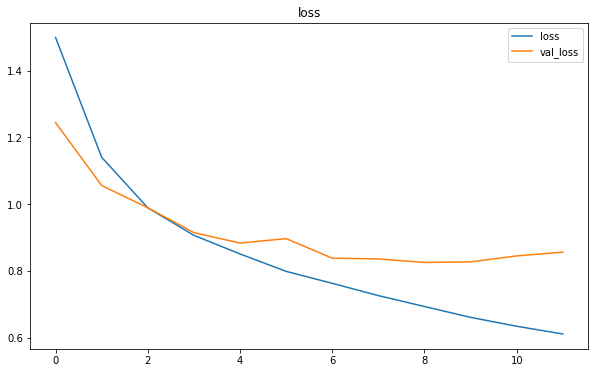

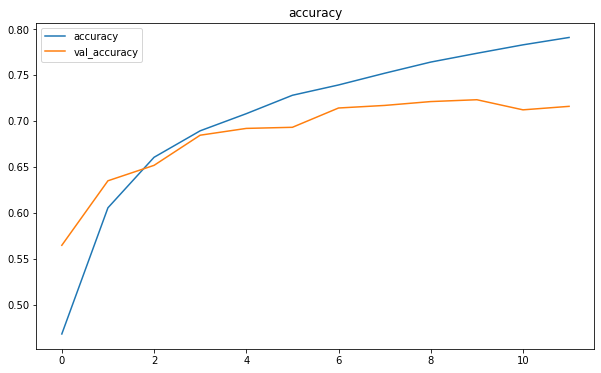

In [ ]:
# 12) Last attempt to find the better model:

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=64, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=12, batch_size=256,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")